### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 2
### Due: Friday, Sep 08 at 11:59 pm CT

## Problem 1

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the exponential of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `lecture_3`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. How the mean and median of x and y compare to each other?

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn theme for improved aesthetics
sns.set_theme(style="whitegrid")

# Define the range for the uniform distribution
low = 1  # Minimum value
high = 10  # Maximum value

# Generate 1000 random samples
x = np.random.uniform(low, high, 1000)



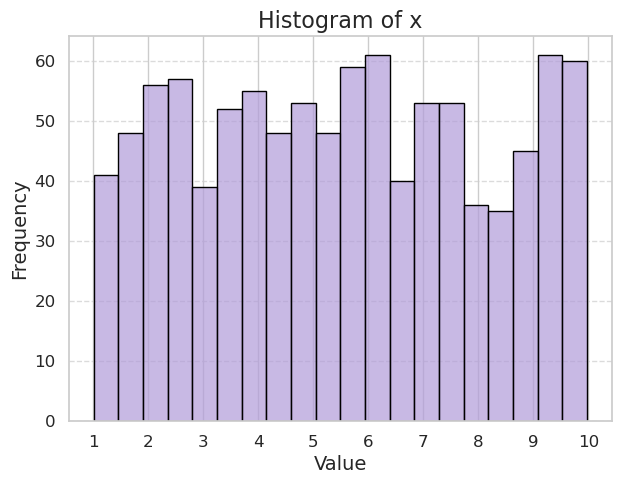

In [64]:
# Creating a histogram with seaborn
plt.figure(figsize=(7, 5))  # Adjust the figure size
sns.histplot(x, bins=20, kde=False, color='#B19CD9', edgecolor='black', alpha=0.7)

# Add labels and a title
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of x', fontsize=16)

# Customize the tick marks and grid
plt.xticks(range(1, 11), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



# y=np.exp(x)  #Defining the relationship between x and y

# # Creating a histogram for y 
# plt.figure(figsize=(7, 5))  
# sns.histplot(x, bins=20, kde=False, color='red', edgecolor='black', alpha=0.4)

# # Add labels and a title
# plt.xlabel('Value', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.title('Histogram of y', fontsize=16)

# # Customize the tick marks and grid
# plt.xticks(range(1, 11), fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.show()

<font size = 3 > Now since p(x) has the form of a uniform distribution, for every x between 1 to 10, each one of them has equal probability. 9 bins, equally spaced, thus p(x) = 1/9 $\forall x \in ${1,...10}. Also since $y = e^{x}$, $p(y) = \frac {dx}{dy} p(x) = e^{-x} p(x) = \frac{1}{y}p(x) = \frac{1}{9y}$. 

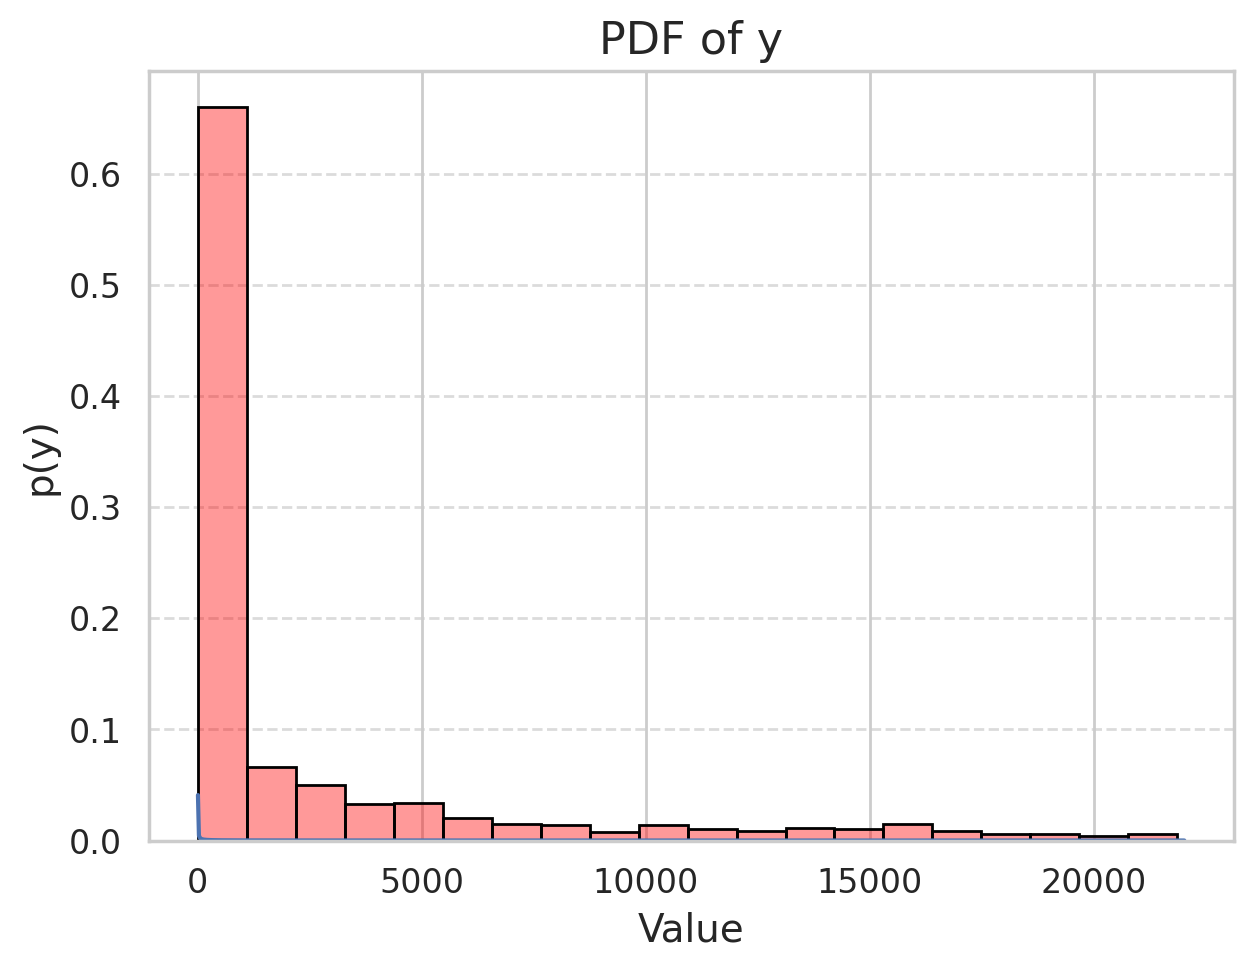

In [70]:
y=np.exp(x)  #Defining the relationship between x and y

# Creating a histogram for y 
plt.figure(figsize=(7, 5))  
sns.histplot(y, bins=20, kde=False, color='red', edgecolor='black', alpha=0.4, stat='probability')

# Add labels and a title
plt.xlabel('Value', fontsize=14)
plt.ylabel('p(y)', fontsize=14)
plt.title('PDF of y', fontsize=16)

# Customize the tick marks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# The PDF of y (theoretically would be)
y_theoretical = np.linspace(np.exp(low), np.exp(high), 1000)
pdf_y_theoretical = (9*y_theoretical)**(-1)

plt.plot(y_theoretical, pdf_y_theoretical)
plt.show()




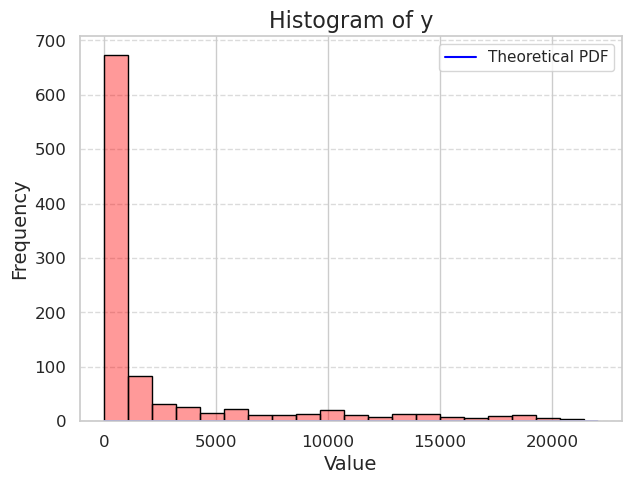

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range for x and compute y
y = np.exp(x)

# Creating a histogram for y
plt.figure(figsize=(7, 5))
sns.histplot(y, bins=20, kde=False, color='red', edgecolor='black', alpha=0.4)

# Add labels and a title
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of y', fontsize=16)

# Customize the tick marks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# The PDF of y (theoretically would be)
y_theoretical = np.linspace(np.exp(low), np.exp(high), 1000)
pdf_y_theoretical = (9 * y_theoretical)**(-1)

# Plot the theoretical PDF on the same plot
plt.plot(y_theoretical, pdf_y_theoretical, label='Theoretical PDF', color='blue')

# Add a legend
plt.legend()

plt.show()


In [9]:
#Calculating mean and median of x and y

mean_x = np.mean(x)
mean_y = np.mean(y)

median_x = np.median(x)
median_y = np.median(y)

print(mean_x, mean_y) #Comparing means

print(median_x, median_y)  #Comparing medians

5.623595134674762 2609.7182520488986
5.723661429745581 306.0241976003265


<font color = 'blue'> Clearly, the deviation in mean between x and y is much more as compared to deviation in their medians. </font> 

## Problem 2

This question is about Monte Carlo integration. The 3$\sigma$ Gaussian confidence level takes the form 

$$ \int_{-3}^{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) \,dx \approx 0.997625$$

1) Write down a python code to plot this Gaussian distribution. Can you tell what is the mean and standard daviation of this Gaussain?


2) Draw $N=10^5$ samples from a Gaussian distribution with mean 0 and standard deviation 1 and then perform Monte Carlo integration using the expression on the left hand side above. Confirm that this *approximately* matches the value given the right hand side of the equation.

3) Repeat (2) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

4) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

5) What if you had drawn N samples from a uniform distribution between $[-3, 3]$, how the accuracy of your results have changed?

<h1> Solution 2 </h1>

The form of the Gaussian which is given to us is:
$$ \int_{-3}^{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) \,dx $$

We can compare it to the standard form of a Gaussian distribution, to get its mean ($\mu$) and standard deviation ($\sigma$).

The standard form of a Gaussian distribution is:

$p(x | \mu, \sigma^{2}) = \frac {1}{\sqrt{2\pi\sigma^{2}}} e^{\frac {-(x-\mu)^2}{2 \sigma^{2}}}$.

Upon comparison, $\mu = 0$ and $\sigma = 1$.

Thus, we need to plot a Gaussian distribution with $\mu = 0$ and $\sigma = 1$. The plotting is done in the next cell.



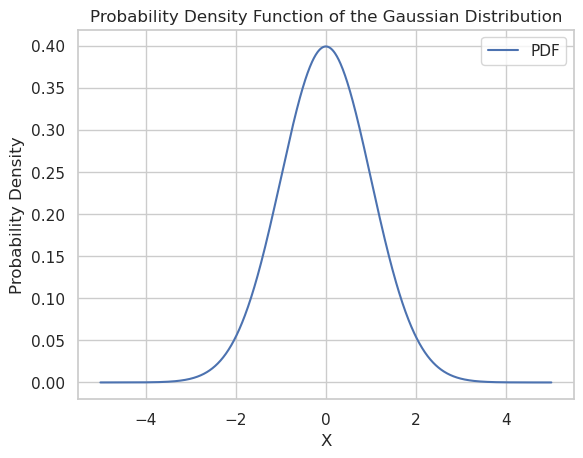

In [21]:
import scipy.stats as stats
import matplotlib.pyplot as plt


distG = stats.norm(0,1)

# Create an array of x values from 0 to 200 with 1000 grid points
x = np.linspace(-5, 5, 1000)

# Calculate the PDF values for the given x values
pdf_values = distG.pdf(x)

# Create a plot
plt.plot(x, pdf_values, label='PDF')
plt.xlabel('X')
# plt.xlim(-3,3)  # As defined in the integral

plt.ylabel('Probability Density')
plt.title('Probability Density Function of the Gaussian Distribution')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<h2> Performing Monte-carlo integration </h2>



In [94]:
import numpy as np

# Define parameters
N = 10**5  # Number of samples
mu = 0  # Mean of the Gaussian distribution
sigma = 1  # Standard deviation of the Gaussian distribution
low_lim = -3
upp_lim = 3

# Generate random samples from a Gaussian distribution
samples = np.random.normal(mu, sigma, N)

# Define the function to integrate
def integrand(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Calculate the integral using Monte Carlo integration
integral_estimate = np.mean(integrand(samples)) * (upp_lim - low_lim)

# True value of the integral
true_value = 0.997625

# Print the estimated and true values
print("Estimated Integral:", integral_estimate)
print("True Value of Integral:", true_value)


Estimated Integral: 1.6930542312883392
True Value of Integral: 0.997625


In [95]:
# print(samples, len(samples), samples.min(), samples.max())

# print(function_values, len(function_values))

## Problem 3
Let x be a continuous random variable with pdf given by $$p(x)=\frac{1}{2}e^{−|x|},$$ for all $x\in\mathbb{R}$. If $y=x^2$, find the cdf of y.

<h1> Solution 3 </h1>

We have $y=x^2$, thus $x = \pm \sqrt{y}$. If $q(y)$ is the probability distribution of $y$, then $ q(y) dy = p(x) dx$.

$q(y) = \frac {e^{-\sqrt{y}}}{4\sqrt{y}}$. If CDF(y) is the Cumulative distribution function of y, then

$CDF(y) = \int_{0}^{y} q(y')dy' = \int_{0}^{y} \frac {e^{-\sqrt{y'}}}{4\sqrt{y'}} dy'$. Let $y' = v^{2}$. 

Thus, we get  $ CDF(y) = \int_{0}^{y} \frac {e^{-v}}{2v} dv = \frac {1- e^{-y}}{2}$